***<div align="center">Task 5: Hyperparameter Tuning with GridSearchCV </div>***

In [10]:
import pandas as pd

In [11]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [23]:
# Load Iris dataset
iris = pd.read_csv("IRIS.csv") 
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
print("Dataset Info:\n", iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Dataset Info:
 None


In [25]:
# Separate features and target
X = iris.drop(columns=["species"])
y = iris["species"]

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [27]:
# Define a Random Forest model
model = RandomForestClassifier(random_state=42)

In [28]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [29]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [30]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [32]:
# Results
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy Score: 0.8888888888888888
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.78      0.93      0.85        15
 Iris-virginica       0.92      0.73      0.81        15

       accuracy                           0.89        45
      macro avg       0.90      0.89      0.89        45
   weighted avg       0.90      0.89      0.89        45



In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

ValueError: The number of FixedLocator locations (105), usually from a call to set_ticks, does not match the number of labels (4).

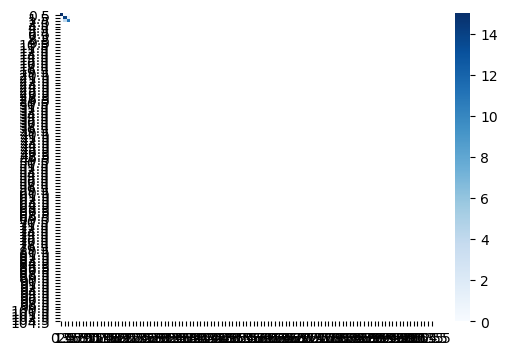

In [41]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=X_train, yticklabels= y_train)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Precision and Recall Visualization
from sklearn.metrics import precision_score, recall_score

# Compute precision and recall for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Bar chart for precision and recall
x_labels = label_encoder.classes_

x = range(len(x_labels))  # Index for each class
width = 0.35  # Bar width

plt.figure(figsize=(8, 6))
plt.bar(x, precision, width=width, label="Precision", color="skyblue")
plt.bar([i + width for i in x], recall, width=width, label="Recall", color="orange")
plt.xticks([i + width / 2 for i in x], x_labels)  # Set labels in the middle of grouped bars
plt.title("Precision and Recall by Class")
plt.ylabel("Score")
plt.xlabel("Classes")
plt.legend()
plt.show()

# Graphical Representation of the Result

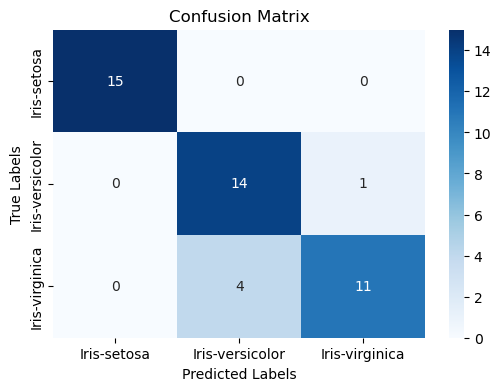

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [44]:
# Precision and Recall Visualization
# Compute precision and recall for each class
precision = precision_score(y_test, y_pred, average=None, labels=best_model.classes_)
recall = recall_score(y_test, y_pred, average=None, labels=best_model.classes_)

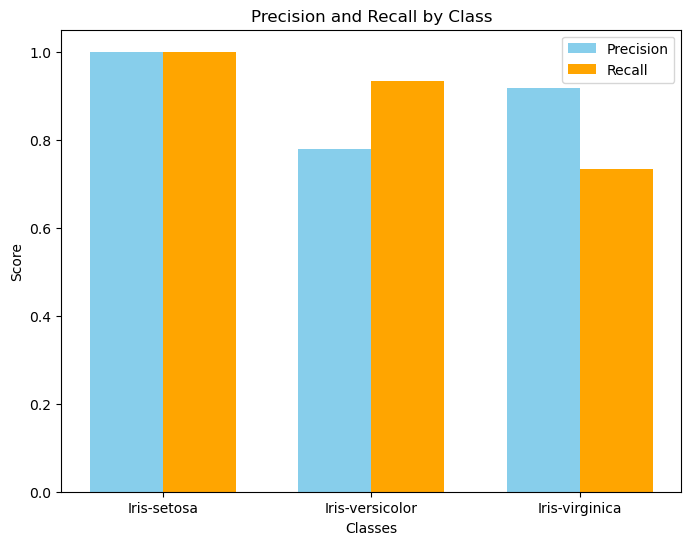

In [45]:
# Bar chart for precision and recall
x_labels = best_model.classes_  # Classes from the model

x = range(len(x_labels))  # Index for each class
width = 0.35  # Bar width

plt.figure(figsize=(8, 6))
plt.bar(x, precision, width=width, label="Precision", color="skyblue")
plt.bar([i + width for i in x], recall, width=width, label="Recall", color="orange")
plt.xticks([i + width / 2 for i in x], x_labels)  # Set labels in the middle of grouped bars
plt.title("Precision and Recall by Class")
plt.ylabel("Score")
plt.xlabel("Classes")
plt.legend()
plt.show()